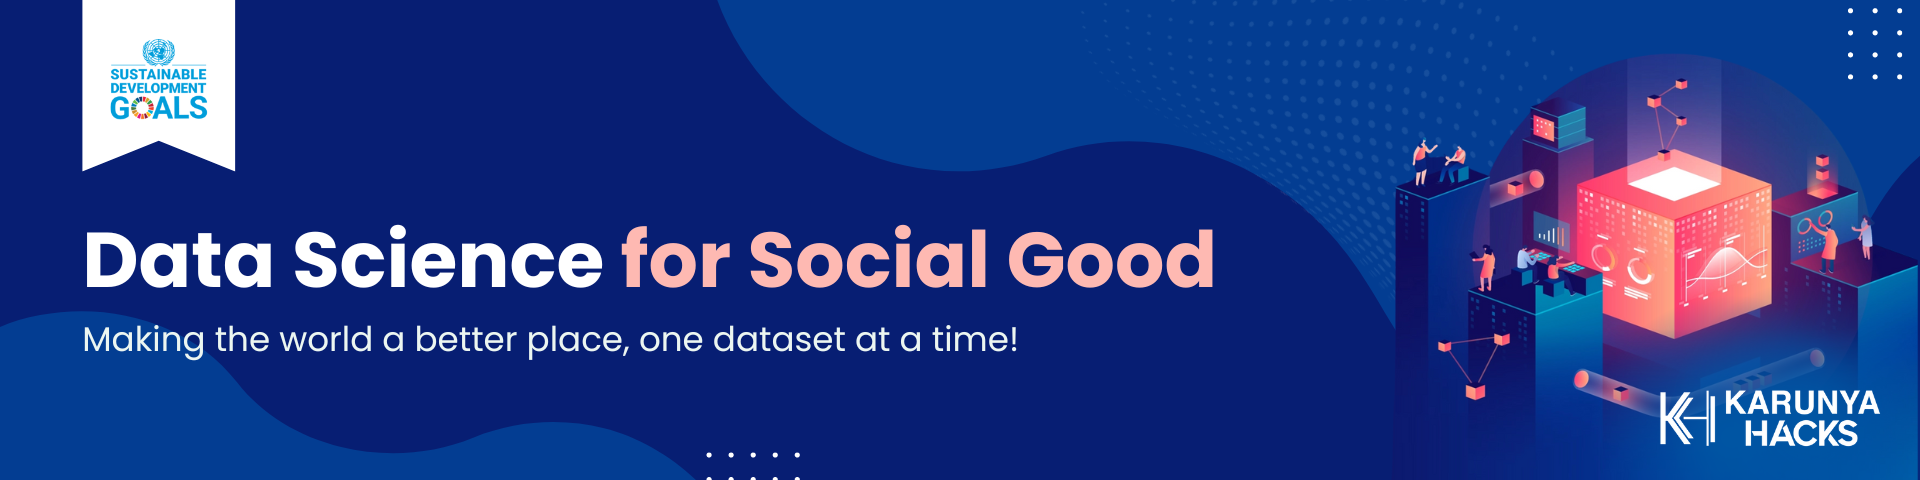

# KNN - Classification

In [2]:
import pandas as pd

path = "./datasets/Cancer.csv"
df = pd.read_csv(path)
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [4]:
df.dropna(inplace = True)

In [6]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'diagnosis'],
      dtype='object')

a) Use the columns: 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
'symmetry_mean', 'fractal_dimension_mean' as the independent variables

In [5]:
x=df.iloc[:, 1:-1].values
print(x[0:10])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01 2.597e-01 9.744e-02]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
  1.043e-01 1.809e-01 5.883e-02]
 [1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
  8.089e-02 2.087e-01 7.613e-02]
 [1.825e+01 1.998e+01 1.196e+02 1.040e+03 9.463e-02 1.090e-01 1.127e-01
  7.400e-02 1.794e-01 5.742e-02]
 [1.371e+01 2.083e+01 9.020e+01 5.779e+02 1.189e-01 1.645e-01 9.366e-02
  5.985e-02 2.196e-01 7.451e-02]
 [1.300e+01 2.182e+01 8.750e+01 5.198e+02 1.273e-01 1.932e-01 1.859e-01
  9.353e-02 2.350e-01 7.389e-02]
 [1.246e+01 2.404e+01 8.397e+01 4.759e+02 1.186e-01 2.3

c. Encode the categorical value of the target column to numerical value

In [7]:
df['diagnosis']= df['diagnosis'].replace({'M':1, 'B':0})
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

b. Use the target variable as 'diagnosis' (Malignant – M, Benign – B)

In [8]:
y = df.iloc[:, -1].values
print(y[0:10])

[1 1 1 1 1 1 1 1 1 1]


d. Divide the data into training (75%) and testing set (25%)

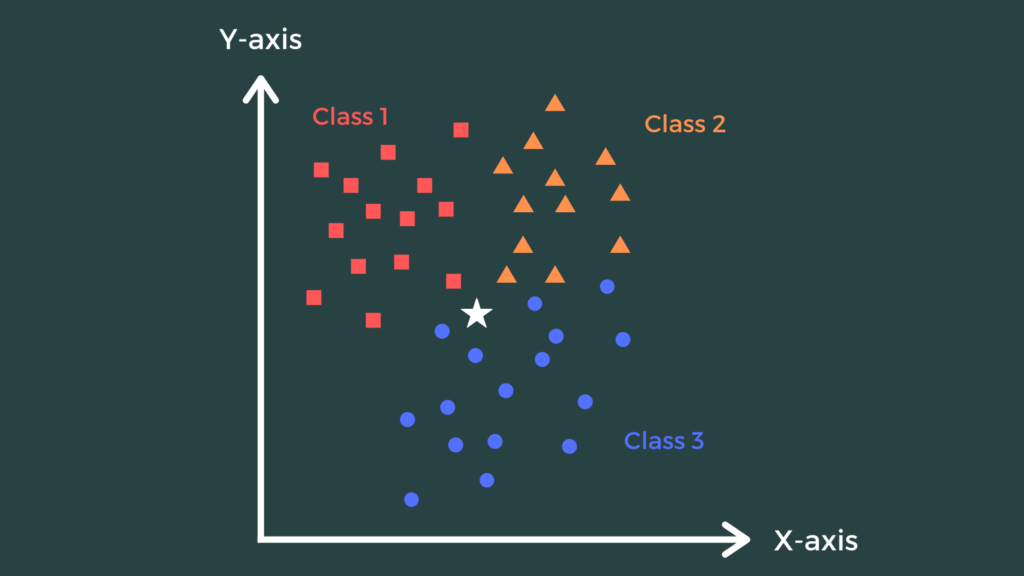

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [10]:
print(x_train)

[[1.522e+01 3.062e+01 1.034e+02 ... 9.429e-02 2.128e-01 7.152e-02]
 [1.496e+01 1.910e+01 9.703e+01 ... 4.819e-02 1.879e-01 5.852e-02]
 [1.468e+01 2.013e+01 9.474e+01 ... 5.259e-02 1.586e-01 5.922e-02]
 ...
 [1.720e+01 2.452e+01 1.142e+02 ... 7.944e-02 1.927e-01 6.487e-02]
 [1.403e+01 2.125e+01 8.979e+01 ... 1.896e-02 1.517e-01 5.835e-02]
 [1.303e+01 1.842e+01 8.261e+01 ... 2.923e-02 1.467e-01 5.863e-02]]


In [11]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

e. Perform the classification with K=3

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)
print(sum(y_pred != y_test))
print(sum(y_pred == y_test))
print(round(((sum(y_pred == y_test))/len(y_pred))*100, 2))

[0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]
[0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]
8
135
94.41


# K-Means Clustering

In [22]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [24]:
import pandas as pd
path = './datasets/Mall_Customers.csv'
dataset = pd.read_csv(path)
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
X = dataset.iloc[:, [3,4]].values

In [27]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/Users/rohanrichard/Desktop/Code/DS for Social Good/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohanrichard/Desktop/Code/DS for Social Good/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohanrichard/Desktop/Code/DS for Social Good/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohanrichard/Desktop/Code/DS for Social Good/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will

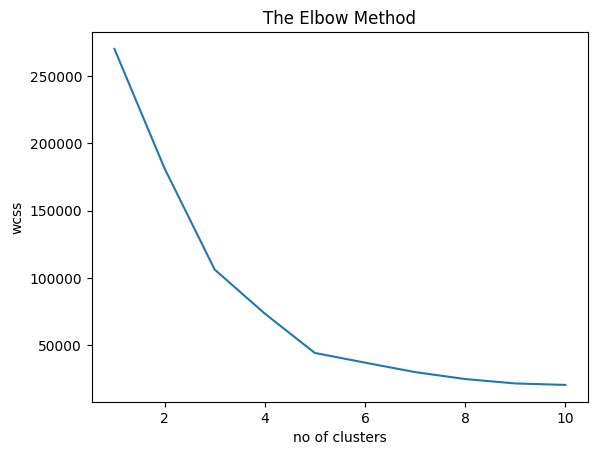

In [28]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [29]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


/Users/rohanrichard/Desktop/Code/DS for Social Good/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


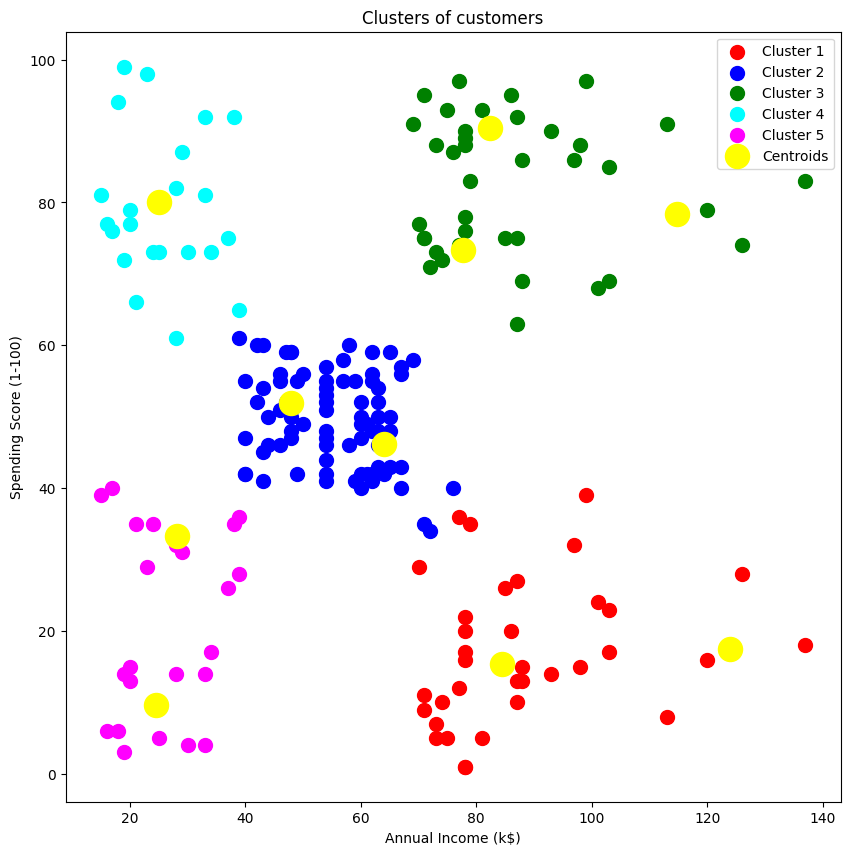

In [32]:
#Visualizing all the clusters 
plt.figure(figsize =(10,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less